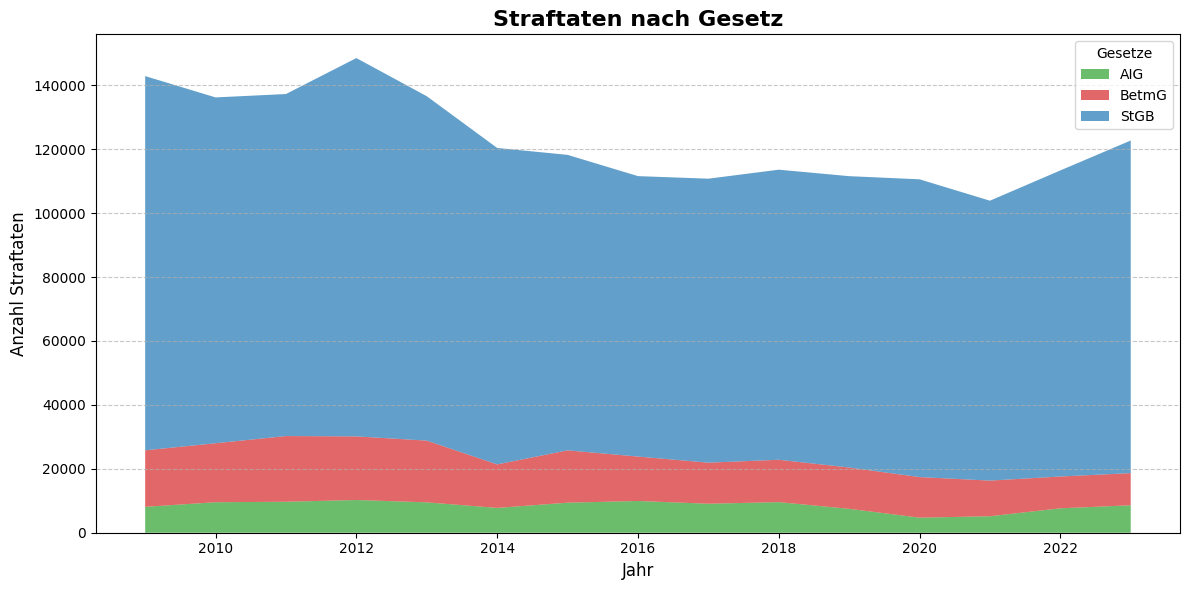

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Laden der CSV-Datei
data_path = "KTZH_00001202_00002278.csv"  # Update this path zur korrekten Datei
df_laws = pd.read_csv(data_path)

# Daten vorbereiten: Summieren der Straftaten pro Gesetz pro Jahr
df_grouped = df_laws.groupby(["Ausgangsjahr", "Gesetz_Abk"]).sum().reset_index()

# Gesetze extrahieren
gesetze = df_grouped["Gesetz_Abk"].unique()

# Farben definieren
colors = {
    "StGB": "#1f77b4",  # Blau
    "BetmG": "#d62728",  # Rot
    "AIG": "#2ca02c"    # Grün
}

# Plot vorbereiten
plt.figure(figsize=(12, 6))

# Jahre und Daten pro Gesetz
years = df_grouped["Ausgangsjahr"].unique()  # Alle Jahre extrahieren
y_values = []  # Liste für die Y-Werte der verschiedenen Gesetze

# Daten für jedes Gesetz extrahieren und sammeln
for gesetz in gesetze:
    df_law = df_grouped[df_grouped["Gesetz_Abk"] == gesetz]
    # Werte nach Jahr sortieren und fehlende Jahre mit 0 auffüllen
    law_values = df_law.set_index("Ausgangsjahr")["Straftaten_total"].reindex(years, fill_value=0).values
    y_values.append(law_values)

# Stackplot zeichnen
plt.stackplot(years, y_values, labels=gesetze, colors=[colors.get(gesetz, "#333333") for gesetz in gesetze], alpha=0.7)

# Plot dekorieren
plt.title("Straftaten nach Gesetz", fontsize=16, fontweight="bold")
plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Anzahl Straftaten", fontsize=12)
plt.legend(title="Gesetze", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Layout anpassen
plt.tight_layout()
plt.show()


Das erste Diagramm zeigt die Entwicklung der registrierten Straftaten im Kanton Zürich zwischen 2009 und 2023, aufgeteilt nach den drei Gesetzesgrundlagen:

StGB (Strafgesetzbuch): Der grösste Anteil der Straftaten entfällt auf das Strafgesetzbuch. Die Anzahl dieser Straftaten war zwischen 2012 und 2016 rückläufig, stieg jedoch seit 2021 wieder an.

BetmG (Betäubungsmittelgesetz): Verstösse gegen das Betäubungsmittelgesetz machen einen massvollen Anteil aus. Diese Kategorie zeigt insgesamt eine relativ konstante Entwicklung mit leichten Schwankungen.

AIG (Ausländer- und Integrationsgesetz): Diese Kategorie umfasst Straftaten im Zusammenhang mit ausländerrechtlichen Bestimmungen. Der Anteil ist relativ gering und bleibt über den Zeitraum weitgehend konstant.

Das Diagramm verdeutlicht, dass die meisten Straftaten im Kanton Zürich auf Verstösse gegen das Strafgesetzbuch zurückzuführen sind, während Straftaten nach dem Betäubungsmittel- und Ausländergesetz eine kleinere Rolle spielen.

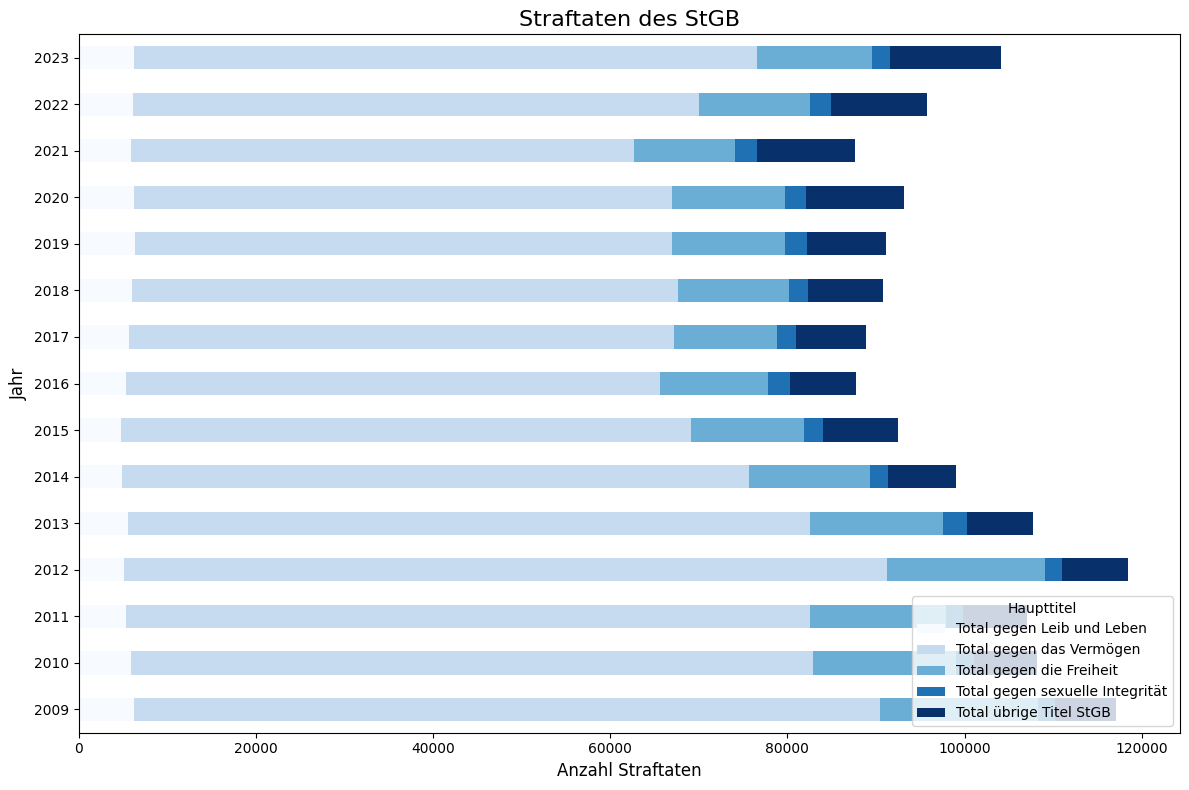

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zur CSV-Datei
data_path = "KTZH_00001202_00002278.csv"

# Daten laden
df = pd.read_csv(data_path)

# Daten filtern: Nur StGB-relevante Daten extrahieren
df_stgb = df[df['Gesetz_Abk'] == 'StGB']

# Daten aufbereiten: Nach Jahr und Kategorie (Haupttitel) aggregieren
df_aggregated_stgb = df_stgb.groupby(['Ausgangsjahr', 'Haupttitel'])['Straftaten_total'].sum().unstack()

# Nur Daten von 2009 bis 2023
df_aggregated_stgb = df_aggregated_stgb.loc[2009:2023]

# Fehlende Werte durch 0 ersetzen (falls vorhanden)
df_aggregated_stgb = df_aggregated_stgb.fillna(0)

# Plot erstellen
ax = df_aggregated_stgb.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    colormap='Blues'  # Verwende eine passende Farbpalette
)

# Titel und Achsenbeschriftungen
plt.title('Straftaten des StGB', fontsize=16)
plt.xlabel('Anzahl Straftaten', fontsize=12)
plt.ylabel('Jahr', fontsize=12)
plt.legend(title='Haupttitel', loc='lower right', fontsize=10)
plt.tight_layout()

# Plot anzeigen
plt.show()


Straftaten gegen Leib und Leben: Diese Kategorie, die Delikte wie Körperverletzung oder Tötungsdelikte umfasst, bleibt über den Zeitraum relativ stabil.

Straftaten gegen das Vermögen: Diese Kategorie (z. B. Diebstahl, Betrug) macht den grössten Anteil aus. Ein deutlicher Rückgang ist zwischen 2012 und 2016 erkennbar.

Straftaten gegen die Freiheit: Diese Delikte (z. B. Freiheitsberaubung, Nötigung) zeigen über die Jahre geringe Schwankungen und bleiben relativ konstant.

Straftaten gegen die sexuelle Integrität: Die Zahlen in dieser Kategorie sind konstant geblieben, was möglicherweise auf ein gleichgeblienes Anzeigeverhalten und eine gleichgebliebene Sensibilisierung hinweist.

Übrige Titel des StGB: Diese Kategorie umfasst eine breite Palette anderer Straftaten.

Das Diagramm zeigt, dass Straftaten gegen das Vermögen den grössten Teil der StGB Verstösse im Kanton Zürich ausmachen, während andere Kategorien deutlich kleinere Anteile haben.

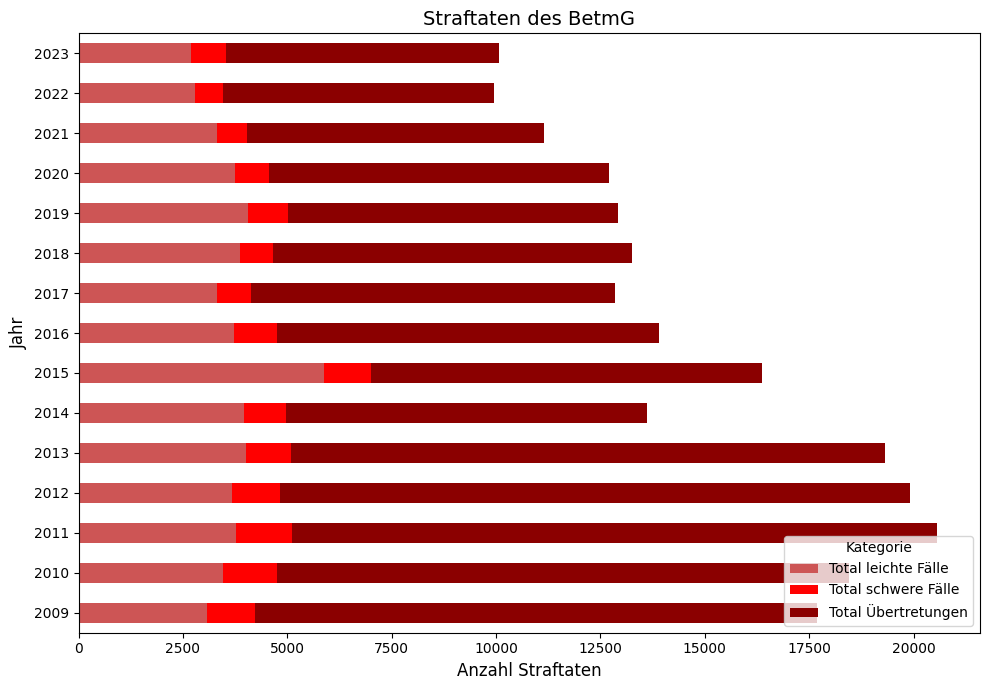

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zur CSV-Datei
data_path = "KTZH_00001202_00002278.csv"

# Daten laden
df = pd.read_csv(data_path)

# Daten filtern: Nur BetmG-relevante Daten extrahieren
df_betmg = df[df['Gesetz_Abk'] == 'BetmG']

# Daten aufbereiten: Nach Jahr und Schweregrad aggregieren
df_aggregated = df_betmg.groupby(['Ausgangsjahr', 'Haupttitel'])['Straftaten_total'].sum().unstack()

# Spaltennamen anpassen, falls nötig
df_aggregated = df_aggregated.rename(columns={
    'Übertretungen': 'Übertretungen',
    'leichte Fälle': 'Leichte Fälle',
    'schwere Fälle': 'Schwere Fälle'
})

# Nur Daten von 2009 bis 2023
df_aggregated = df_aggregated.loc[2009:2023]

# Fehlende Werte durch 0 ersetzen (falls vorhanden)
df_aggregated = df_aggregated.fillna(0)

# Plot erstellen
ax = df_aggregated.plot(kind='barh', stacked=True, figsize=(10, 7), color=['#CD5555', '#FF0000', '#8B0000'])

# Titel und Achsenbeschriftungen
plt.title('Straftaten des BetmG', fontsize=14)
plt.xlabel('Anzahl Straftaten', fontsize=12)
plt.ylabel('Jahr', fontsize=12)
plt.legend(title='Kategorie', loc='lower right', fontsize=10)
plt.tight_layout()

# Plot anzeigen
plt.show()


Leichte Fälle: Diese Fälle kommen als zweitmeisten vor und zeigen steigende Zahlen bis 2015. Dann wird es jedoch relativ stabil und fällt zurück.

Schwere Fälle:  Diese Fälle machen den kleinsten Anteil aus und bleiben über die Jahre relativ konstant. Schwerwiegendere Verstösse, wie der Handel mit illegalen Substanzen, zeigen eine Zunahme bis 2015, danach eine leichte Abnahme.

Übertretungen: Diese machen den grössten Anteil aus, insbesondere einfache Konsumdelikte. Nach einem Höhepunkt 2013 sind die Zahlen rückläufig und sinken seit 2021 noch mehr.

Das Diagramm zeigt, dass Übertretungen, insbesondere durch Konsum kleiner Mengen, den grössten Anteil der Verstösse im Kanton Zürich ausmachen. Nach einem Anstieg bis 2015 ist in den Kategorien Schwere Fälle und Übertretungen ein leichter Rückgang zu beobachten. Dies könnte auf veränderte gesetzliche Rahmenbedingungen, Präventionsmassnahmen oder eine veränderte Strafverfolgung hinweisen.

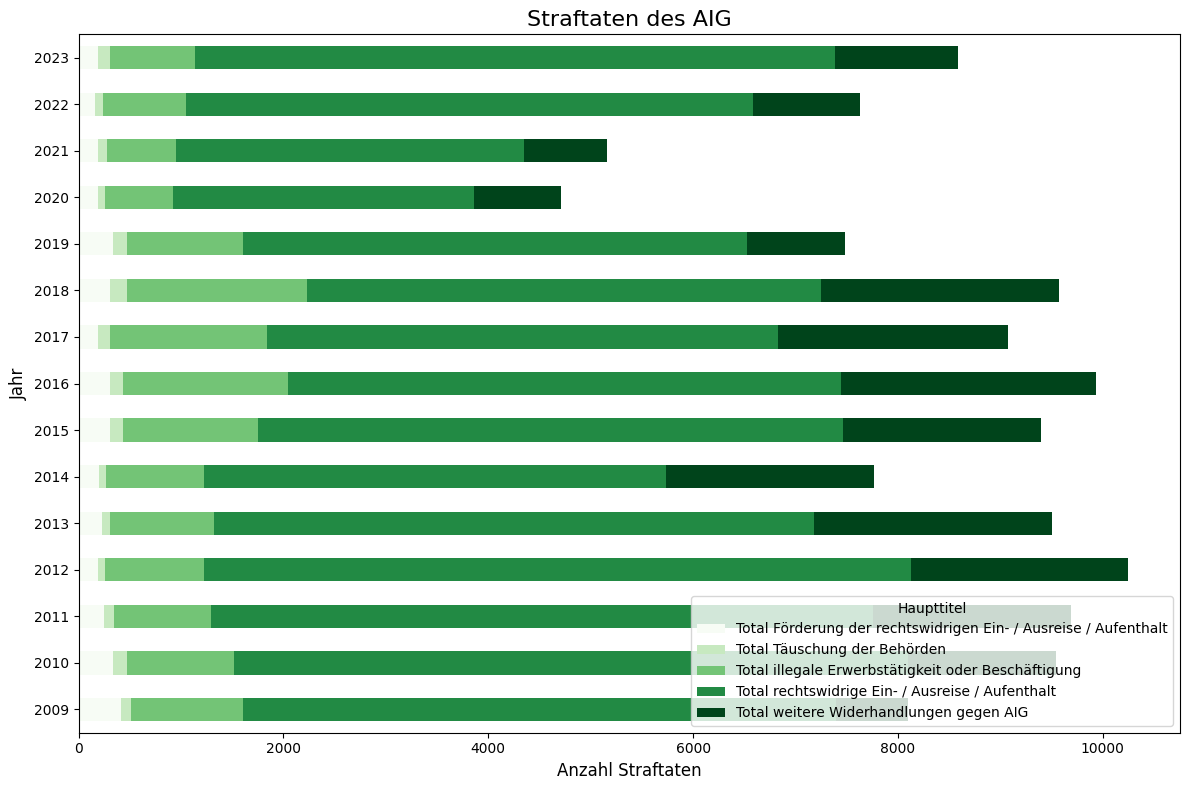

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zur CSV-Datei
data_path = "KTZH_00001202_00002278.csv"

# Daten laden
df = pd.read_csv(data_path)

# Daten filtern: Nur AIG-relevante Daten extrahieren
df_aig = df[df['Gesetz_Abk'] == 'AIG']

# Daten aufbereiten: Nach Jahr und Kategorie (Haupttitel) aggregieren
df_aggregated_aig = df_aig.groupby(['Ausgangsjahr', 'Haupttitel'])['Straftaten_total'].sum().unstack()

# Nur Daten von 2009 bis 2023
df_aggregated_aig = df_aggregated_aig.loc[2009:2023]

# Fehlende Werte durch 0 ersetzen (falls vorhanden)
df_aggregated_aig = df_aggregated_aig.fillna(0)

# Plot erstellen
ax = df_aggregated_aig.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    colormap='Greens'  # Verwende eine passende Farbpalette
)

# Titel und Achsenbeschriftungen
plt.title('Straftaten des AIG', fontsize=16)
plt.xlabel('Anzahl Straftaten', fontsize=12)
plt.ylabel('Jahr', fontsize=12)
plt.legend(title='Haupttitel', loc='lower right', fontsize=10)
plt.tight_layout()

# Plot anzeigen
plt.show()


Förderung der rechtswidrigen Ein- oder Ausreise bzw. des Aufenthalts: Diese Kategorie umfasst Delikte, bei denen Personen illegalen Aufenthalt oder Einreise ermöglichen. Die Zahlen sind über die Jahre weitgehend stabil.

Täuschung der Behörden: Hierunter fallen Straftaten wie das Vorlegen falscher Dokumente oder falscher Angaben gegenüber Behörden. Diese Kategorie zeigt über die Jahre kleinere Schwankungen, jedoch keine bemerkenswerte Trends.

Illegale Erwerbstätigkeit oder Beschäftigung: Die Verstösse in diesem Bereich schwanken stark, mit einem Höchststand im Jahr 2018 und einem deutlichen Rückgang in den Folgejahren.

Rechtswidrige Ein- oder Ausreise bzw. Aufenthalt: Diese Kategorie ist die grösste im AIG. Die Zahl dieser Verstösse zeigt eine abnehmende Tendenz im Jahr 2014, steigt jedoch wieder rasant an.

Weitere Widerhandlungen gegen das AIG: Diese Kategorie umfasst andere Verstösse gegen das Gesetz. Die Zahlen sind hier relativ konstant, wobei leichte Rückgänge seit 2019 erkennbar sind.

Das Diagramm verdeutlicht, dass die häufigsten Verstösse im Zusammenhang mit rechtswidrigem Aufenthalt oder Einreise stehen. Die Schwankungen und Rückgänge in einigen Kategorien könnten auf veränderte gesetzliche Bestimmungen, verstärkte Kontrollen oder eine veränderte Handhabung der Strafverfolgung zurückzuführen sein.

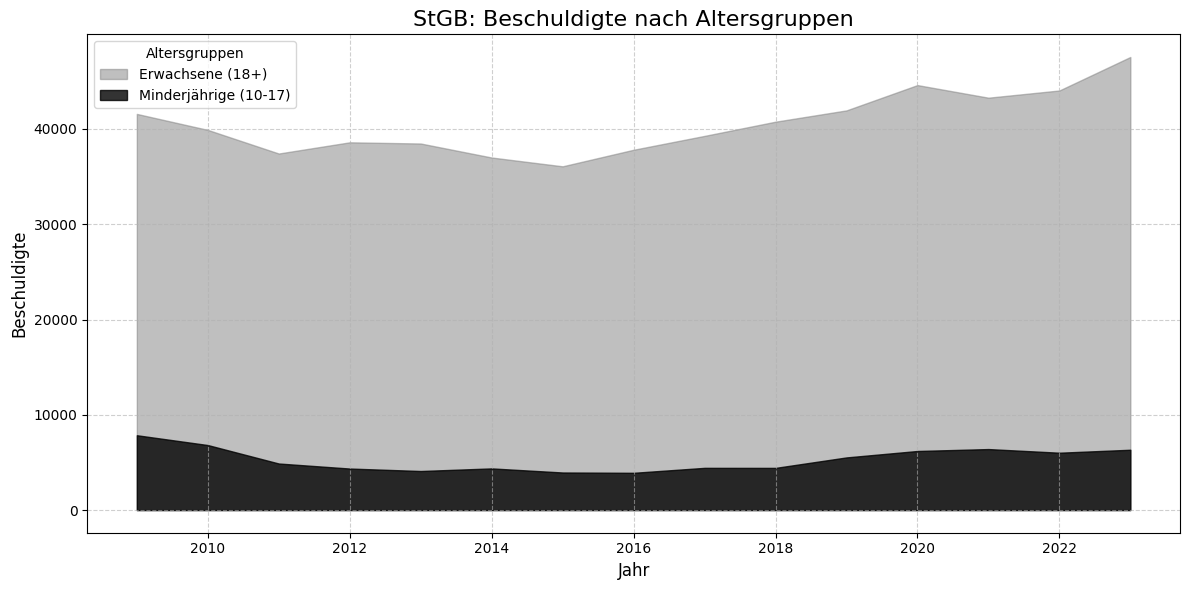

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = "KTZH_00001202_00002319.csv"  # Ersetze dies durch den tatsächlichen Dateipfad
data = pd.read_csv(file_path)

# Daten vorbereiten
jahre = data['Ausgangsjahr'].unique()

# Summiere Erwachsene und Minderjährige nach Jahr
erwachsene = data.groupby('Ausgangsjahr')['Erwachsene_Total'].sum()
minderjaehrige = data.groupby('Ausgangsjahr')['Minderjährige_Total'].sum()

data_aggregated = pd.DataFrame({
    'Jahr': jahre,
    'Erwachsene': erwachsene.values,
    'Minderjährige': minderjaehrige.values
})

# Diagramm erstellen
plt.figure(figsize=(12, 6))
plt.fill_between(data_aggregated['Jahr'], data_aggregated['Erwachsene'] + data_aggregated['Minderjährige'], color="gray", alpha=0.5, label='Erwachsene (18+)')
plt.fill_between(data_aggregated['Jahr'], data_aggregated['Minderjährige'], color="black", alpha=0.8, label='Minderjährige (10-17)')

plt.title("StGB: Beschuldigte nach Altersgruppen", fontsize=16)
plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Beschuldigte", fontsize=12)
plt.legend(title="Altersgruppen", loc="upper left")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


Das letzte Diagramm zeigt die Entwicklung der Beschuldigtenzahlen nach Altersgruppen im Kanton Zürich zwischen 2009 und 2023 für Straftaten gemäss Strafgesetzbuch (StGB). Die Daten sind in zwei Altersgruppen unterteilt:

Erwachsene (18+): Die grösste Gruppe der Beschuldigten, die den grössten Anteil an den Gesamtdelikten ausmacht. Die Anzahl der beschuldigten Erwachsenen zeigt eine steigende Tendenz ab 2015. Die Zahlen im Jahr 2023 erreicht den Höchstenstand in diesem Zeitraum.

Minderjährige (10-17): Diese Gruppe stellt einen deutlich kleineren Anteil dar, mit relativ konstanten Zahlen über den betrachteten Zeitraum. Leichte Schwankungen sind erkennbar, jedoch keine drastischen Veränderungen.


Der Anstieg bei beschuldiften Erwachsenen könnte auf gesellschaftliche, wirtschaftliche oder rechtliche Veränderungen hindeuten.
Minderjährige sind relativ konstant beteiligt, was möglicherweise auf stabile Präventions- und Interventionsmassnahmen hindeutet.